# CenterNet's Limitations and Drawbacks

While being great and bringing a lot of advantages, CenterNet is not perfect! This notebook explores into further depth CenterNet's main shortcomming: Occultation.

## I - General Set Up

This cell allows to go up in the tree to have access to everything with the paths from the root of the project.

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/mathieu.rivier/Desktop/DNN-centerNet


The necessary libraries to compile the notebook are then imported.

```NotebookHelpers``` is a class that was created to enable simpler explanation of CenterNet's limitations

In [2]:
%%capture
import numpy as np

from jupyter.notebook_helpers import NotebookHelpers

## II - Exploring 30 numbers max complex dataset

This first dataset aims to really put CenterNet through its paces and understand where some of its shortcommings are. __PART III__ will explore how much of a shortcomming occultation/overlaping problem really is.  

### 2.1. Set Up & Exploration

In [3]:
# Defining the dataset's path
thirty_base_path = 'data/complicated/thirty_numbers/'

# Instanciating the helpers for this notebook
thirty_helpers = NotebookHelpers(thirty_base_path)

In [4]:
# The number of samples in the current dataset
print(f'There are {len(thirty_helpers.img_indexes)} samples in the current dataset.')

There are 112 samples in the current dataset.


### 2.2. Understanding the metrics & Exploring examples.

The idea of this section is to explain what the data in this dataset looks like. As well as explaning what are the different metrics that are used to assess quality of prediction.

#### 2.2.1. What are the metrics

In order to understand the results that were achieved in multi-digit detection with this model, it is first interesting to understand how the performance was registered.

Throughout the implementation of this project, the performance of this implementation of CenterNet was performed using multiple metrics. The first metric is the Average Accuracy (refered to as AA), which measures the average digit-detection accuracy. Four different AA measures are used in this paper: AA5, AA50, AA75 and AA95, which corresponds to only keeping the detections that have IoUs (Intersection over Union) that are superior to the corresponding threshold. 

The second metric used in this paper is False Discovery (refered to as FD), The implementation in this paper is slightly different to the one used in the original paper in which $$FD = 1 - AP$$. In this paper it enables the measure of the percentage of bounding boxes (bbox) that are incorrectly detected. This allows for a better estimation of the total number of wrongly generated bboxes by the model.

The average IoU (refered to as mIoU) is the final metric used in this paper. It provides an estimation of the proximity of the bounding boxes generated by the model compared to the bounding boxes provided by the ground truth (labels).

#### 2.2.2. Exploring Examples

This section enables to visualise problems encountered with occultation.

Average IoU: 0.763

Average Accuracy & False Discoveries per threshold:
AA_0.05: 0.8
FD_0.05: 0.0
AA_0.5 : 0.68
FD_0.5 : 0.15
AA_0.75: 0.64
FD_0.75: 0.2
AA_0.95: 0.04
FD_0.95: 0.95


Plot of the predictions:


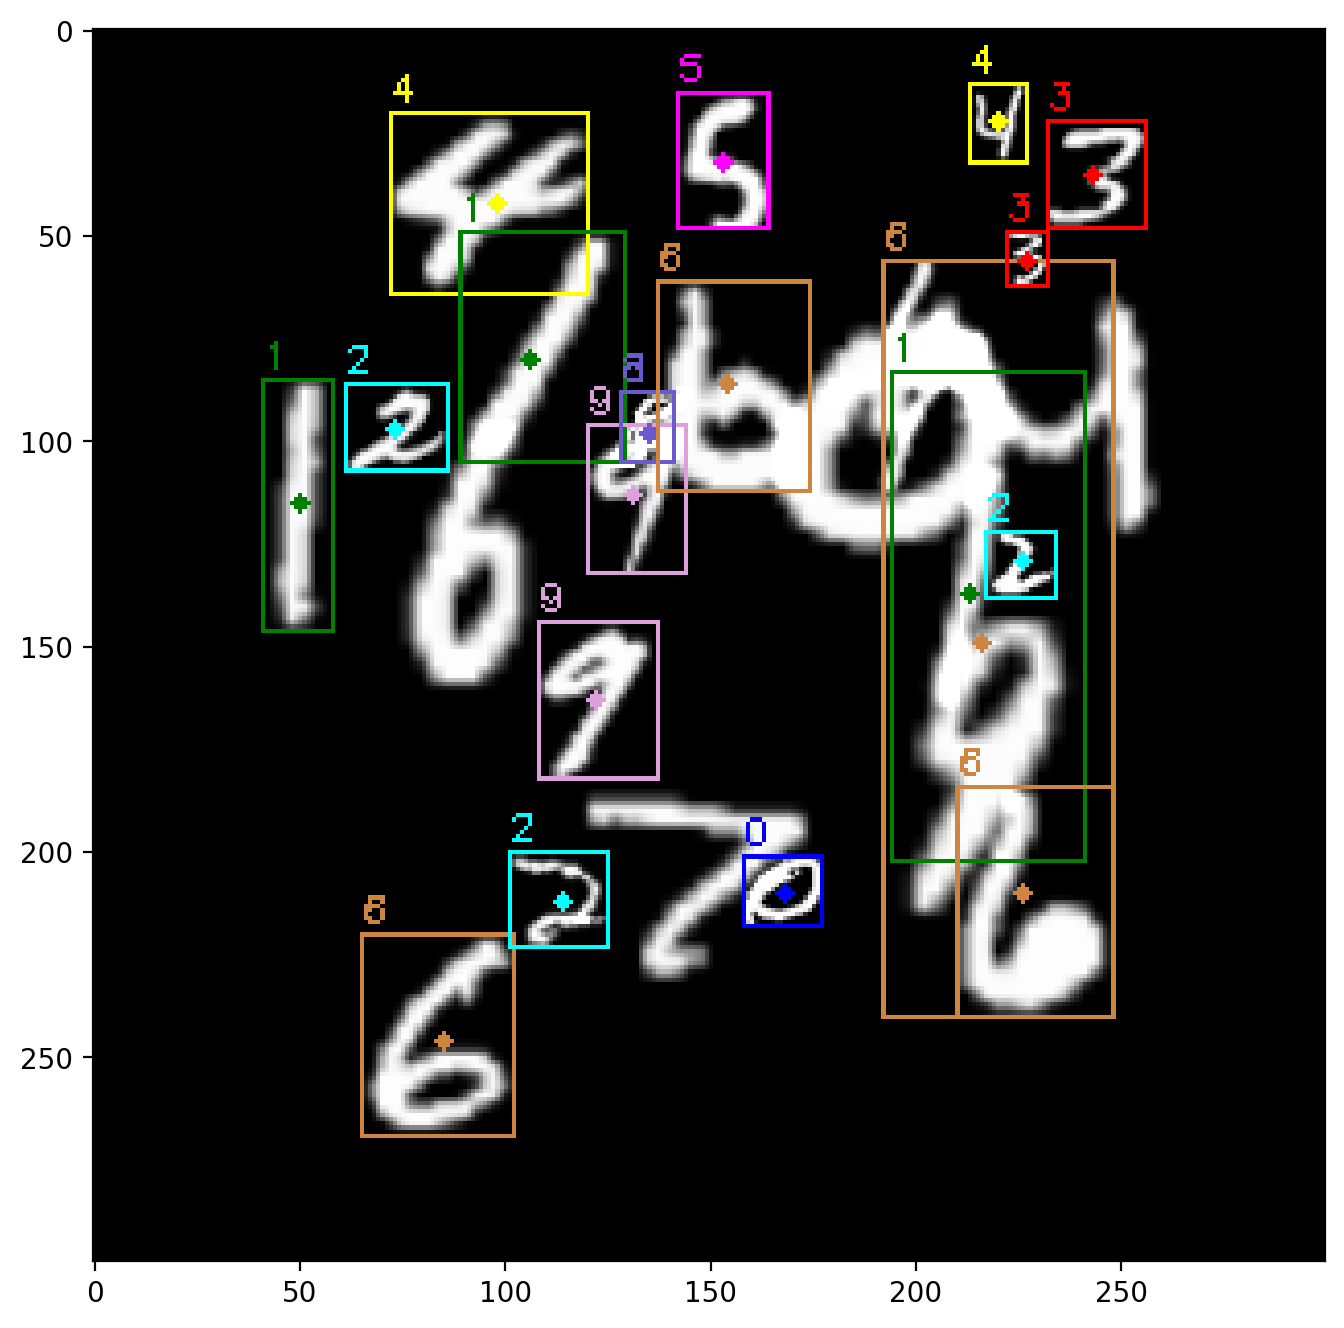

In [11]:
thirty_helpers.predict_img(thirty_helpers.img_indexes[1], display=True)

As can be seen in the picture above, Many numbers that are easily identifiable by humans are left undetected:
    - 6, 7, 0 -
are one that jump to the eye.

The problem lies in the even minor occultation of those numbers that prevents the model from detecting and thus predicting a digit. 

Although it is important to note that general accuracy remains very good.

Average IoU: 0.758

Average Accuracy & False Discoveries per threshold:
AA_0.05: 0.69
FD_0.05: 0.125
AA_0.5 : 0.655
FD_0.5 : 0.208
AA_0.75: 0.586
FD_0.75: 0.292
AA_0.95: 0.069
FD_0.95: 0.917


Plot of the predictions:


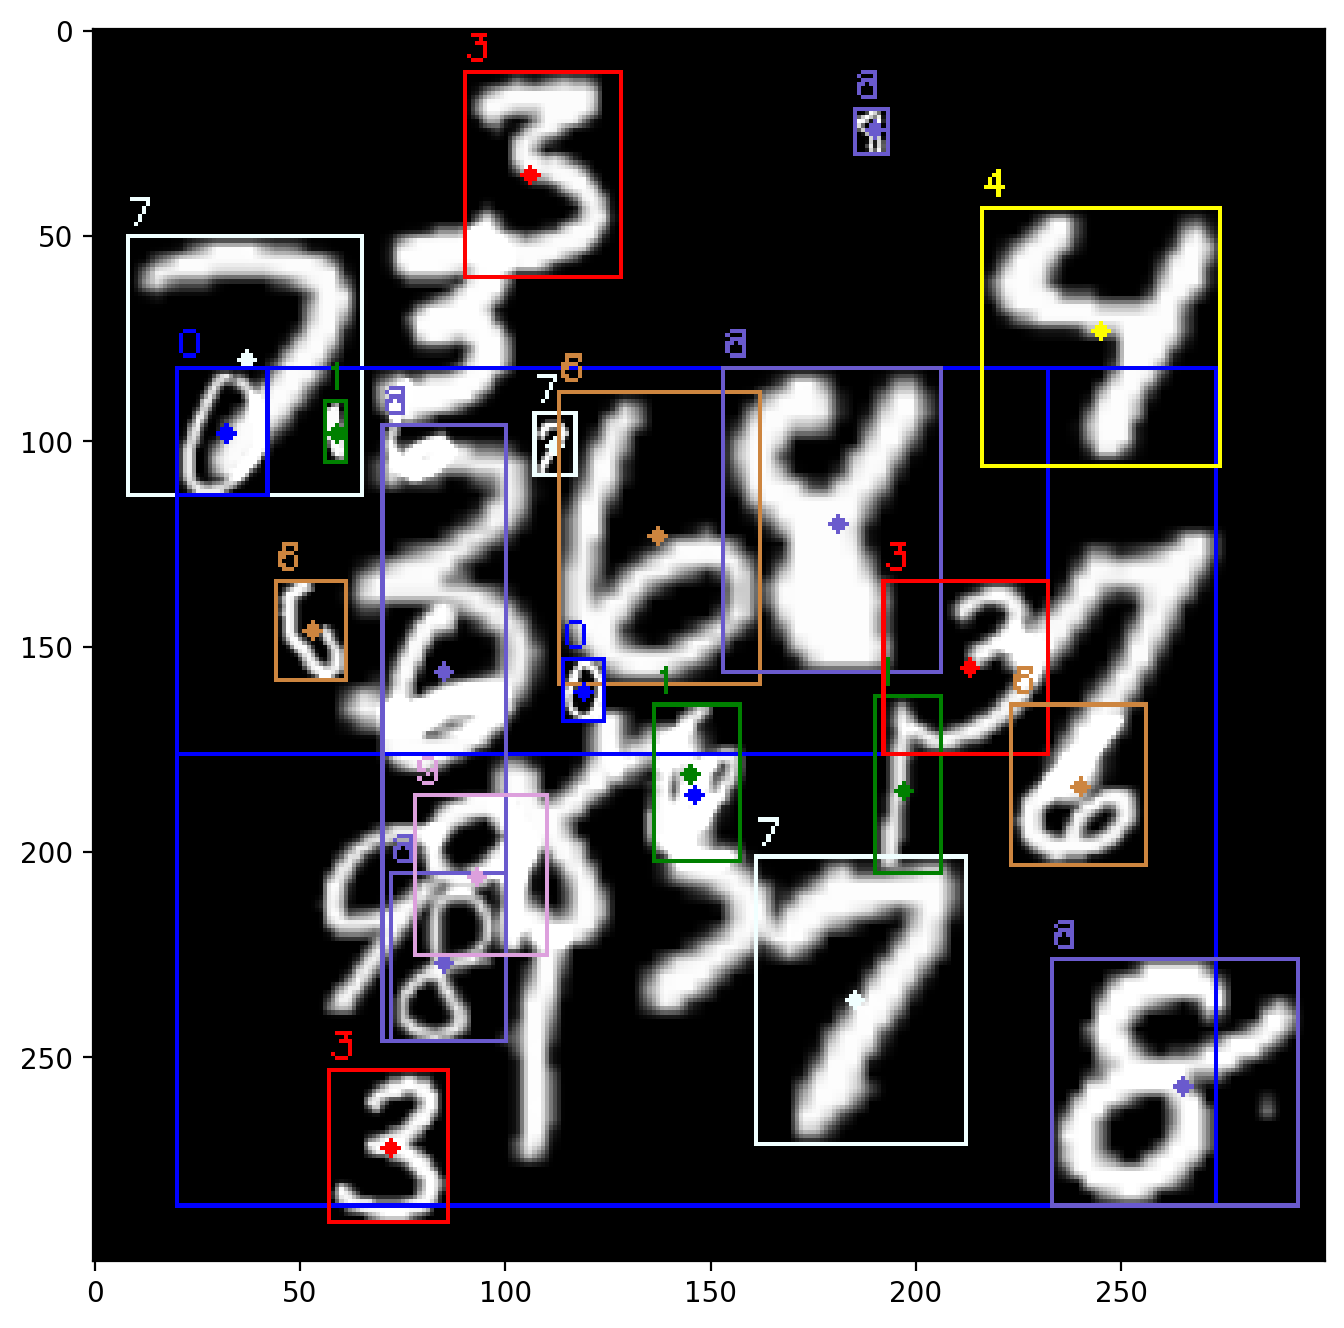

In [16]:
thirty_helpers.predict_img(thirty_helpers.img_indexes[5], display=True)

When there are too many digits as in the above picture, the model get lost in the predictions and misses complete numbers and miss bound numbers. 

### 2.3. Evaluating on a full dataset

This dataset is composed of pictures containing a lot of occultation. It is clearly visible that it performs worse than other dataset we have trained that ranged upwards of 91% accuracy

In [6]:
thirty_helpers.get_ds_avg_metrics(display=True)

Average IoU: 0.828

Average Accuracy & False Discoveries per threshold:
AA_0.05: 0.797
FD_0.05: 0.045
AA_0.5 : 0.762
FD_0.5 : 0.086
AA_0.75: 0.704
FD_0.75: 0.157
AA_0.95: 0.14
FD_0.95: 0.834




The results remain rather good while still presenting a lot of false detections. 

## III - Exploring 15 numbers max complex dataset

This is a simpler dataset than the one in __PART II__ because it has a smaller max number of numbers per image than the one in __PART II__. Although, this dataset enables to showcase the considerable shortcomming of CenterNet with occulted/overlapped content.

### 3.1 - Set Up and Exploration

In [7]:
# Setting the path to the data and Instanciating the helper class 
base_path = 'data/complicated/fifteen_numbers/'

fifteen_helpers = NotebookHelpers(base_path)

In [8]:
# The number of samples in the current dataset
print(f'There are {len(fifteen_helpers.img_indexes)} samples in the current dataset.')

There are 62 samples in the current dataset.


### 3.2 - Understanding the metrics

The idea of this section is to explain what the data in this dataset looks like. As well as explaning what are the different metrics that are used to assess quality of prediction.

Average IoU: 0.856

Average Accuracy & False Discoveries per threshold:
AA_0.05: 0.778
FD_0.05: 0.222
AA_0.5 : 0.778
FD_0.5 : 0.222
AA_0.75: 0.667
FD_0.75: 0.333
AA_0.95: 0.111
FD_0.95: 0.889


Plot of the predictions:


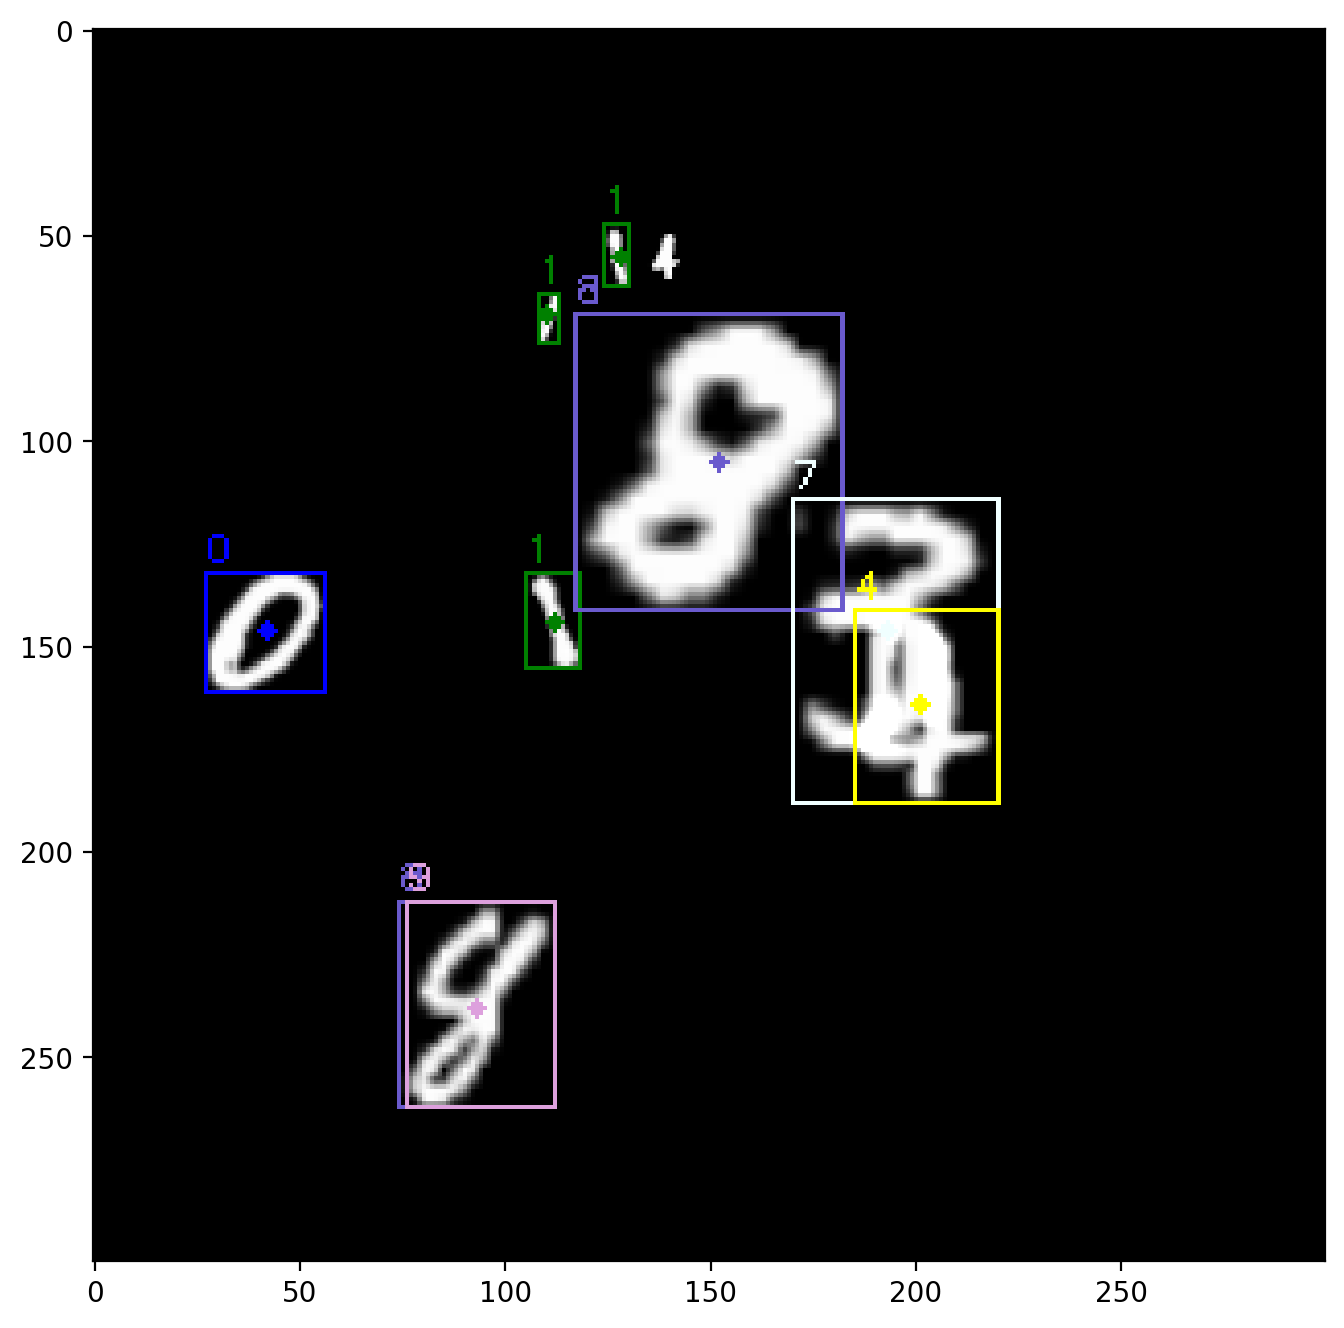

In [9]:
fifteen_helpers.predict_img(fifteen_helpers.img_indexes[0], display=True)

### 3.3 - Understanding performance  on this dataset

In [10]:
fifteen_helpers.get_ds_avg_metrics(display=True)

Average IoU: 0.881

Average Accuracy & False Discoveries per threshold:
AA_0.05: 0.825
FD_0.05: 0.038
AA_0.5 : 0.813
FD_0.5 : 0.055
AA_0.75: 0.78
FD_0.75: 0.091
AA_0.95: 0.186
FD_0.95: 0.782




With less digits and thus less overlap the predictions automatically get better both in terms of Average accuracy increasing as well as with False Detection lowering.